Input the measured inclination: 0.835
Input the measured luminosity distance: 750
Input the measured SNR: 18
Input the normalisation factor (value between 0 and 1, if unknown, submit 0.5): 0.75


<ipython-input-5-7f26c31f0840>:174: RuntimeWarning: invalid value encountered in sqrt
  outside_expo = 1/(2*np.pi*x_sigma*y_sigma*np.sqrt((1-(rho**2))))
<ipython-input-5-7f26c31f0840>:175: RuntimeWarning: overflow encountered in exp
  distribution = outside_expo*np.exp(-(inside_expo_1*inside_expo_2))


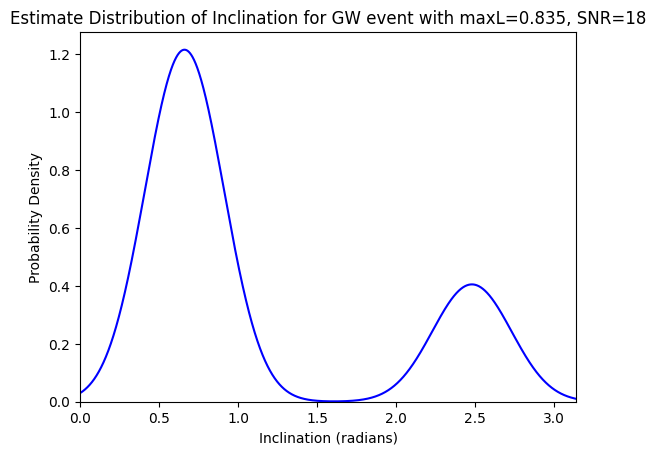

The process has taken 364.07139349s to complete.


In [ ]:
#Preliminary Importations
#Import libraries as needed
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import scipy
from scipy.optimize import curve_fit
import seaborn as sns
import scipy.stats as stats
import time

#Preliminary Step
#Use code to check time elapsed for process to complete
time_start = time.perf_counter()

#Step 1
#Ask user what values they have for both the inclination angle and the SNR, as well as the normalisation factor (use to scale peaks)
measured_iota = input("Input the measured inclination: ")
measured_lum_dist = input("Input the measured luminosity distance: ")
measured_snr = input("Input the measured SNR: ")
norm_factor = input("Input the normalisation factor (value between 0 and 1, if unknown, submit 0.5): ")

#Step 2
#Import the names of all available events, as well as their associated inclinations of maximum likelihood, luminosity distance of maximum likelihood, and the SNR of the detection
events = ['GW150914_095045', 'GW151012_095443', 'GW151226_033853', 'GW170104_101158', 'GW170608_020116', 'GW170729_185629', 'GW170809_082821',
          'GW170814_103043', 'GW170817_124104', 'GW170818_022509', 'GW170823_131358', 'GW190403_051519', 'GW190408_181802', 'GW190412_053044',
          'GW190413_052954', 'GW190413_134308', 'GW190421_213856', 'GW190425_081805', 'GW190426_190642', 'GW190503_185404', 'GW190512_180714',
          'GW190513_205428', 'GW190514_065416', 'GW190517_055101', 'GW190519_153544', 'GW190521_030229', 'GW190521_074359', 'GW190527_092055',
          'GW190602_175927', 'GW190620_030421', 'GW190630_185205', 'GW190701_203306', 'GW190706_222641', 'GW190707_093326', 'GW190708_232457',
          'GW190719_215514', 'GW190720_000836', 'GW190725_174728', 'GW190727_060333', 'GW190728_064510', 'GW190731_140936', 'GW190803_022701',
          'GW190805_211137', 'GW190814_211039', 'GW190828_063405', 'GW190828_065509', 'GW190910_112807', 'GW190915_235702', 'GW190916_200658',
          'GW190917_114630', 'GW190924_021846', 'GW190925_232845', 'GW190926_050336', 'GW190929_012149', 'GW190930_133541', 'GW191103_012549',
          'GW191105_143521', 'GW191109_010717', 'GW191113_071753', 'GW191126_115259', 'GW191127_050227', 'GW191129_134029', 'GW191204_110529',
          'GW191204_171526', 'GW191215_223052', 'GW191216_213338', 'GW191219_163120', 'GW191222_033537', 'GW191230_180458', 'GW200105_162426',
          'GW200112_155838', 'GW200115_042309', 'GW200128_022011', 'GW200129_065458', 'GW200202_154313', 'GW200208_130117', 'GW200208_222617',
          'GW200209_085452', 'GW200210_092254', 'GW200216_220804', 'GW200219_094415', 'GW200220_061928', 'GW200220_124850', 'GW200224_222234',
          'GW200225_060421', 'GW200302_015811', 'GW200306_093714', 'GW200308_173609', 'GW200311_115853', 'GW200316_215756', 'GW200322_091133']

max_like_dist = np.array([509.142, 1076.777, 458.027, 995.041, 221.972, 3122.680, 1140.223,
                          641.900, 1216.481, 2227.460, 8949.090, 1392.358, 724.497, 3702.184,
                          1687.942, 2742.806, 7438.993, 883.914, 1365.122, 1992.023, 4592.411,
                          944.677, 4113.782, 2511.766, 713.333, 1736.624, 4297.827, 2951.045,
                          683.994, 2391.874, 4811.902, 293.384, 1000.296, 4112.179, 635.910,
                          587.272, 3453.879, 508.602, 5039.202, 4107.122, 10642.424, 227.627,
                          2116.309, 1607.781, 2906.622, 1504.384, 7310.533, 484.152, 326.055,
                          932.453, 2818.581, 2055.768, 673.289, 1097.690, 429.064, 556.470,
                          794.267, 1604.074, 1207.006, 759.931, 2381.628, 375.394, 1578.366,
                          396.788, 4144.617, 2936.284, 1585.885, 4627.836, 791.314, 227.439,
                          1704.864, 3205.395, 953.663, 869.827, 1523.204, 4178.720, 11229.072,
                          4362.295, 1462.214, 988.378, 1052.058, 3280.440, 9206.945, 920.364,
                          964.208, 5212.709])

max_like_incl = np.array([2.369, 0.498, 0.287, 0.649, 1.883, 0.854, 2.607,
                          0.556, 3.078, 2.414, 2.937, 0.709, 0.785, 0.425,
                          1.644, 2.243, 2.684, 2.215, 0.815, 0.622, 3.088,
                          1.386, 1.999, 1.122, 1.949, 1.633, 2.656, 2.305,
                          1.645, 0.408, 0.540, 1.878, 0.664, 2.454, 2.537,
                          1.624, 0.694, 1.455, 0.491, 2.647, 0.742, 0.808,
                          2.441, 2.743, 2.735, 0.826, 0.394, 1.680, 1.121,
                          0.349, 0.835, 1.362, 0.542, 2.808, 1.397, 1.575,
                          1.753, 0.327, 1.872, 0.546, 0.502, 2.193, 1.065,
                          2.449, 0.436, 2.195, 0.335, 0.843, 0.156, 2.145,
                          2.607, 1.276, 1.299, 0.525, 2.331, 0.669, 1.489,
                          1.402, 1.192, 1.831, 0.389, 2.584, 2.977, 1.012,
                          2.477, 2.743])

snr_data = np.array([26.0,10.0,13.1,13.8,15.4,10.8,12.8,17.7,12.0,12.2,7.6,14.6,19.8,
                     9.0,10.6,10.7,8.7,12.2,12.7,12.5,8.0,10.8,15.9,14.3,25.9,8.0,13.2,
                     12.1,16.4,11.2,13.4,13.1,13.4,7.9,10.9,9.1,11.7,13.1,8.8,9.3,8.1,
                     25.3,16.5,10.2,14.5,13.1,8.1,8.3,12.0,9.7,8.1,9.7,9.7,8.9,9.7,17.3,
                     7.9,8.3,9.2,13.1,8.9,17.4,1.2,18.6,12.5,10.4,19.8,10.6,26.8,10.8,10.8,
                     7.4,9.6,8.4,8.1,10.7,7.2,8.5,20.0,12.5,10.8,7.8,4.7,17.8,10.3,4.5])

#Step 3
#Check whether the data files for all available events can be accessed, where those that can be accessed are downloaded
#If not, the event name will be removed from the above array
no_data = []
for i in range(len(events)):
  try:
    dist_file = f"wget -q https://raw.githubusercontent.com/gwtc/samples/refs/heads/main/{events[i]}/samples/C01:IMRPhenomXPHM/C01:IMRPhenomXPHM_luminosity_distance.dat"
    dist = subprocess.run(dist_file, shell=True, check=True)
  except subprocess.CalledProcessError as e:
    no_data.append(events[i])
  try:
    incl_file = f"wget -q https://raw.githubusercontent.com/gwtc/samples/refs/heads/main/{events[i]}/samples/C01:IMRPhenomXPHM/C01:IMRPhenomXPHM_iota.dat"
    incl = subprocess.run(incl_file, shell=True, check=True)
  except subprocess.CalledProcessError as e:
    no_data.append(events[i])

for i in range(len(events)-1, -1, -1):
  for j in range(len(no_data)):
    if events[i] == no_data[j]:
      events.pop(i)
      break

n = np.linspace(0, (len(events)-1), len(events))

def data_dist(x, y):
  all_data = []
  data = []
  events = {}
  for i in range(len(x)):
    if i == 0:
      data = np.loadtxt(f'C01:IMRPhenomXPHM_luminosity_distance.dat', dtype=float, skiprows=1)
      all_data.append(data)
    else:
      data = np.loadtxt(f'C01:IMRPhenomXPHM_luminosity_distance.dat.{i}', dtype=float, skiprows=1)
      all_data.append(data)
  for i in range(len(y)):
    events[y[i]] = all_data[i]
  return events

distance = data_dist(n, events)

def incl_dist(x, y):
  all_data = []
  data = []
  events = {}
  for i in range(len(x)):
    if i == 0:
      data = np.loadtxt(f'C01:IMRPhenomXPHM_iota.dat', dtype=float, skiprows=1)
      all_data.append(data)
    else:
      data = np.loadtxt(f'C01:IMRPhenomXPHM_iota.dat.{i}', dtype=float, skiprows=1)
      all_data.append(data)
  for i in range(len(y)):
    events[y[i]] = all_data[i]
  return events

inclination = incl_dist(n, events)

#Step 4
#Adjust the position of any inclination data point with a value to be within range 0 to pi/2 (radians)
#Apply this process to the inclinations of maximum likelihood as well
inclinations = {}
for event in events:
  inclinations[event] = []
  for i in range(len(inclination[event])):
    if inclination[event][i] > np.pi/2:
      inclinations[event].append(np.pi - inclination[event][i])
    else:
      inclinations[event].append(inclination[event][i])

max_like_incl_adjust = []
for i in range(len(max_like_incl)):
  if max_like_incl[i] > np.pi/2:
    max_like_incl_adjust.append(np.pi - max_like_incl[i])
  else:
    max_like_incl_adjust.append(max_like_incl[i])

#Step 5
#Define functions for a bivariate gaussian, a bivariate skewed Gaussian, and a reciprocal function
#Define additional functions that help find the mean of a skewed Gaussian and to revert back to the location
#Define a bivariate skewed double Gaussian as well
#Define a function to determine the parameters of the bivariate skew normal distribution (both locations, both scales, both shape parameters, and correlation coefficient)
def reciprocal(x, a, b):
  y = a*(1/x) + b
  return y

def mean_skew_gau(mu, sigma, alpha):
  delta = (alpha)/np.sqrt(1+(alpha**2))
  m0 = mu + (np.sqrt(2/np.pi)*delta*sigma)
  return m0

def revert_mean_skew_gau(mean, sigma, alpha):
  delta = (alpha)/np.sqrt(1+(alpha**2))
  mu = mean - (np.sqrt(2/np.pi)*delta*sigma)
  return mu

def twoD_Gaussian(xy, x_mu, y_mu, x_sigma, y_sigma, rho):
  x, y = xy
  inside_expo_1 = 1/(2*(1-(rho**2)))
  inside_expo_2 = (((x-x_mu)/x_sigma)**2) - (2*rho)*((x-x_mu)/x_sigma)*((y-y_mu)/y_sigma) + (((y-y_mu)/y_sigma)**2)
  outside_expo = 1/(2*np.pi*x_sigma*y_sigma*np.sqrt((1-(rho**2))))
  distribution = outside_expo*np.exp(-(inside_expo_1*inside_expo_2))
  return distribution

def twoD_skew_Gaussian(xy, x_mu, y_mu, x_sigma, y_sigma, rho, x_alpha, y_alpha):
  x, y = xy
  twoD_gau = twoD_Gaussian(xy, x_mu, y_mu, x_sigma, y_sigma, rho)
  skewness = x_alpha*((x - x_mu)/x_sigma) + y_alpha*((y - y_mu)/y_sigma)
  skew_param = stats.norm.cdf(skewness)
  return 2*twoD_gau*skew_param

def twoD_double_skewed_gau(xy, x_mu, y_mu, x_sigma, y_sigma, rho, x_alpha=0.0, y_alpha=0.0, norm_factor=0.5):
    skew1 = twoD_skew_Gaussian(xy, x_mu, y_mu, x_sigma, y_sigma, rho, x_alpha, y_alpha)
    x_mu_2 = np.pi - x_mu
    skew2 = twoD_skew_Gaussian(xy, x_mu_2, y_mu, x_sigma, y_sigma, -rho, -x_alpha, y_alpha)
    return norm_factor * skew1 + (1 - norm_factor) * skew2

def twoD_skew_Gaussian_para(x):
  incl_mu_skew = []
  dist_mu_skew = []
  incl_sigma_skew = []
  dist_sigma_skew = []
  rhos_skew = []
  x_alpha_skew = []
  y_alpha_skew = []
  for i in range(len(x)):
    intensity, incl_edges, dist_edges = np.histogram2d(inclinations[events[i]], distance[events[i]], bins=500, density=True)
    incl_centers = 0.5 * (incl_edges[:-1] + incl_edges[1:])
    dist_centers = 0.5 * (dist_edges[:-1] + dist_edges[1:])
    incl_grid, dist_grid = np.meshgrid(incl_centers, dist_centers)
    incldist_grid = np.vstack((incl_grid.ravel(), dist_grid.ravel()))
    intensity_flat = intensity.T.ravel()
    popt_skew, _ = curve_fit(twoD_skew_Gaussian, incldist_grid, intensity_flat,
                        p0=[np.mean(inclinations[events[i]]), np.mean(distance[events[i]]), np.std(inclinations[events[i]]), np.std(distance[events[i]]), 0, 0, 0],
                        maxfev=10000)

    x_mean, y_mean, x_sigma, y_sigma, rho, x_skew, y_skew = popt_skew
    incl_mu_skew.append(x_mean)
    dist_mu_skew.append(y_mean)
    incl_sigma_skew.append(x_sigma)
    dist_sigma_skew.append(y_sigma)
    rhos_skew.append(rho)
    x_alpha_skew.append(x_skew)
    y_alpha_skew.append(y_skew)
  return incl_mu_skew, dist_mu_skew, incl_sigma_skew, dist_sigma_skew, rhos_skew, x_alpha_skew, y_alpha_skew

data_skew = twoD_skew_Gaussian_para(events)

#Step 6
#Using the function to find the parameter values, create individual arrays for each parameter
twoD_skew_incl_mu = data_skew[0]
twoD_skew_dist_mu = data_skew[1]
twoD_skew_incl_sigma = data_skew[2]
twoD_skew_dist_sigma = data_skew[3]
twoD_skew_rho = data_skew[4]
twoD_skew_incl_alpha = data_skew[5]
twoD_skew_dist_alpha = data_skew[6]

#Step 7
#Using the mean function, calculate the mean for each distribution, along both axes
twoD_skew_incl_mean_skewgau = []
twoD_skew_dist_mean_skewgau = []
for i in range(len(twoD_skew_incl_mu)):
  mean_incl = mean_skew_gau(twoD_skew_incl_mu[i], twoD_skew_incl_sigma[i], twoD_skew_incl_alpha[i])
  mean_dist = mean_skew_gau(twoD_skew_dist_mu[i], twoD_skew_dist_sigma[i], twoD_skew_dist_alpha[i])
  twoD_skew_incl_mean_skewgau.append(mean_incl)
  twoD_skew_dist_mean_skewgau.append(mean_dist)

#Step 8
#For data whose residual is less than 0.3, determine the gradient and intercept values for conversion from inclination of maximum likelihood to mean
use_max_like5 = []
used_twoD_skew_incl_mean_skewgau = []
counts = 0
for i in range(len(max_like_incl_adjust)):
  if twoD_skew_incl_mean_skewgau[i] < np.pi/2:
    val = max_like_incl_adjust[i]
    diff = abs(val - twoD_skew_incl_mean_skewgau[i])
    if diff < 0.3:
      use_max_like5.append(max_like_incl_adjust[i])
      used_twoD_skew_incl_mean_skewgau.append(twoD_skew_incl_mean_skewgau[i])
      counts += 1
slope_mean_muskew, inter_mean_muskew, pear_mean_muskew, _, _ = stats.linregress(use_max_like5, used_twoD_skew_incl_mean_skewgau)

#Step 9
#For data whose residual is less than 0.3, determine the gradient and intercept values for conversion from luminosity distance of maximum likelihood to mean (all in log base 10)
use_max_like6 = []
used_twoD_skew_dist_mean_skewgau = []
counts = 0
for i in range(len(max_like_dist)):
  ditt = np.log10(max_like_dist[i])
  datt = np.log10(twoD_skew_dist_mean_skewgau[i])
  val = ditt
  diff = abs(val - datt)
  if diff < 0.3:
    use_max_like6.append(ditt)
    used_twoD_skew_dist_mean_skewgau.append(datt)
    counts += 1
slope_mean_dist_muskew, inter_mean_dist_muskew, pear_mean_dist_muskew, _, _ = stats.linregress(use_max_like6, used_twoD_skew_dist_mean_skewgau)

#Step 10
#For SNR greater than 5, determine the gradient and intercept values for conversion from SNR to inclination std dev (using a reciprocal fitting model)
use_twoD_skew_incl_sigma = []
use_snr1 = []
for i in range(len(snr_data)):
  if 0 < twoD_skew_incl_sigma[i] < 0.9 and snr_data[i] > 5:
    use_twoD_skew_incl_sigma.append(twoD_skew_incl_sigma[i])
    use_snr1.append(snr_data[i])
  else:
    continue
p_guess_sigma_incl = [1, 0.2]
popt_sigma_incl, _ = curve_fit(reciprocal, use_snr1, use_twoD_skew_incl_sigma, p0=p_guess_sigma_incl, bounds = ([0, 0], [np.inf, 1.0]), maxfev=10000)

#Step 11
#For SNR greater than 5, determine the gradient and intercept values for conversion from SNR to luminosity distance std dev (using a reciprocal fitting model)
use_twoD_skew_dist_sigma = []
use_snr2 = []
for i in range(len(snr_data)):
  if 0 < twoD_skew_dist_sigma[i] < 4000 and snr_data[i] > 3:
    use_twoD_skew_dist_sigma.append(twoD_skew_dist_sigma[i])
    use_snr2.append(snr_data[i])
  else:
    continue
p_guess_sigma_dist = [50, 0]
popt_sigma_dist, _ = curve_fit(reciprocal, use_snr2, use_twoD_skew_dist_sigma, p0=p_guess_sigma_incl, bounds = ([0, 0], [np.inf, 1.0]), maxfev=10000)

#Step 12
#For SNR greater than 3, determine the gradient and intercept values for conversion from SNR to correlation coefficient (using a reciprocal fitting model)
use_snr3 = []
use_rho = []
for i in range(len(snr_data)):
  if snr_data[i] > 3:
    use_snr3.append(snr_data[i])
    use_rho.append(twoD_skew_rho[i])
  else:
    continue
p_guess_rhos = [100, -10]
popt_rhos, _ = curve_fit(reciprocal, use_snr3, use_rho, p0=p_guess_rhos)

#Step 13
#For shape parameters whose values are greater than -100, determine the gradient and intercept values for conversion from maximum likelihood inclination to shape parameter
use_max_like3 = []
used_twoD_skew_incl_alpha = []
for i in range(len(max_like_incl_adjust)):
  if twoD_skew_incl_alpha[i] > -100:
    use_max_like3.append(max_like_incl_adjust[i])
    used_twoD_skew_incl_alpha.append(twoD_skew_incl_alpha[i])
slope_incl_alpha, inter_incl_alpha, pear_incl_alpha, _, _ = stats.linregress(use_max_like3, used_twoD_skew_incl_alpha)

#Step 14
#For shape parameters whose values are between -5 and 25, determine the gradient and intercept values for conversion from maximum likelihood luminosity distance to shape parameter
use_max_like4 = []
used_twoD_skew_dist_alpha = []
for i in range(len(max_like_dist)):
  if 25 > twoD_skew_dist_alpha[i] > -5 and max_like_dist[i] < 10000:
    use_max_like4.append(max_like_dist[i])
    used_twoD_skew_dist_alpha.append(twoD_skew_dist_alpha[i])
slope_dist_alpha, inter_dist_alpha, pear_dist_alpha, _, _ = stats.linregress(use_max_like4, used_twoD_skew_dist_alpha)

#Step 15
#Redefine the gradient and intercept of all fits such that they are more identifiable
slope_mean_dist2 = slope_mean_dist_muskew
intercept_mean_dist2 = inter_mean_dist_muskew

slope_mean_incl2 = slope_mean_muskew
intercept_mean_incl2 = inter_mean_muskew

a_sigma_dist = popt_sigma_dist[0]
b_sigma_dist = popt_sigma_dist[1]

a_sigma_incl = popt_sigma_incl[0]
b_sigma_incl = popt_sigma_incl[1]

a_rho = popt_rhos[0]
b_rho = popt_rhos[1]

slope_alpha_incl = slope_incl_alpha
intercept_alpha_incl = inter_incl_alpha

slope_alpha_dist = slope_dist_alpha
intercept_alpha_dist = inter_dist_alpha


#Step 16
#Use the inputted values for maximum likelihood inclination and maximum likelihood luminosity distance, SNR, and normalisation factor to reproduce the estimated curve
#Use these to create arrays which extend across the possible inclination angle and luminosity distance values
prac_sigma_dist = a_sigma_dist/float(measured_snr) + b_sigma_dist
prac_sigma_incl = a_sigma_incl/float(measured_snr) + b_sigma_incl
prac_rho = a_rho/float(measured_snr) + b_rho
prac_incl_alpha = slope_alpha_incl*float(measured_iota) + intercept_alpha_incl
prac_dist_alpha = slope_alpha_dist*float(measured_lum_dist) + intercept_alpha_dist
prac_mean_dist_base10 = slope_mean_dist2*np.log10(float(measured_lum_dist)) + intercept_mean_dist2
intermediate_prac_mean_dist = 10**prac_mean_dist_base10
prac_mean_dist = revert_mean_skew_gau(intermediate_prac_mean_dist, prac_sigma_dist, prac_dist_alpha)
if float(measured_iota) > np.pi/2:
  intermediate_prac_mean_incl = slope_mean_incl2*(np.pi - float(measured_iota)) + intercept_mean_incl2
  prac_mean_incl = revert_mean_skew_gau(intermediate_prac_mean_incl, prac_sigma_incl, prac_incl_alpha)
else:
  intermediate_prac_mean_incl = slope_mean_incl2*float(measured_iota) + intercept_mean_incl2
  prac_mean_incl = revert_mean_skew_gau(intermediate_prac_mean_incl, prac_sigma_incl, prac_incl_alpha)

norm_factor = float(norm_factor)
prac_dist_data = np.linspace(0.5*prac_mean_dist, 1.5*prac_mean_dist, 5000)
prac_incl_data = np.linspace(0, np.pi, 5000)
prac_incl_grid, prac_dist_grid = np.meshgrid(prac_incl_data, prac_dist_data)
prac_xy = np.vstack((prac_incl_grid.ravel(), prac_dist_grid.ravel()))
prac_height = twoD_double_skewed_gau(prac_xy, prac_mean_incl, prac_mean_dist, prac_sigma_incl, prac_sigma_dist, prac_rho, prac_incl_alpha, prac_dist_alpha, norm_factor=norm_factor)
prac_height = prac_height.reshape(prac_incl_grid.shape)
height_incl_marginal = np.trapezoid(prac_height, prac_dist_data, axis=0)
height_incl_marginal /= np.trapezoid(height_incl_marginal, prac_incl_data)

plt.plot(prac_incl_data, height_incl_marginal, 'b-')
plt.xlabel('Inclination (radians)')
plt.ylabel('Probability Density')
plt.title(f'Estimate Distribution of Inclination for GW event with maxL={measured_iota}, SNR={measured_snr}')
plt.xlim(0, np.pi)
plt.ylim(bottom=0)
plt.show()

#Final Step
#Conclude the timing of the code, print the result
time_finish = time.perf_counter()
duration = time_finish - time_start
print(f'The process has taken {duration}s to complete.')